In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Reliance.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-18,463.799988,465.649994,454.975006,456.000000,436.671021,5142766.0
1,2015-11-19,459.450012,469.350006,458.625000,467.375000,447.563873,5569752.0
2,2015-11-20,467.000000,476.399994,462.774994,473.424988,453.357422,5167930.0
3,2015-11-23,475.000000,478.950012,473.100006,476.875000,456.661224,4800026.0
4,2015-11-24,476.500000,485.799988,475.524994,483.850006,463.340515,6768886.0


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1228,2020-11-10,2077.0,2090.000000,2041.199951,2084.550049,2084.550049,17045147.0
1229,2020-11-11,2089.0,2095.000000,1978.099976,1997.199951,1997.199951,26178477.0
1230,2020-11-12,1981.0,2008.449951,1965.000000,1980.000000,1980.000000,18481466.0
1231,2020-11-13,1982.0,2036.650024,1981.750000,1996.400024,1996.400024,20946864.0
1232,2020-11-17,2085.0,2085.000000,1985.000000,1993.250000,1993.250000,21479385.0


In [5]:
df.size

8631

In [6]:
df.shape

(1233, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1233 entries, 0 to 1232
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1233 non-null   object 
 1   Open       1232 non-null   float64
 2   High       1232 non-null   float64
 3   Low        1232 non-null   float64
 4   Close      1232 non-null   float64
 5   Adj Close  1232 non-null   float64
 6   Volume     1232 non-null   float64
dtypes: float64(6), object(1)
memory usage: 67.6+ KB


# EDA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1233 entries, 0 to 1232
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1233 non-null   object 
 1   Open       1232 non-null   float64
 2   High       1232 non-null   float64
 3   Low        1232 non-null   float64
 4   Close      1232 non-null   float64
 5   Adj Close  1232 non-null   float64
 6   Volume     1232 non-null   float64
dtypes: float64(6), object(1)
memory usage: 67.6+ KB


In [9]:
df.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [10]:
# dropping  null value  
df.dropna(subset=['Open','High','Low','Close','Adj Close','Volume'], inplace=True)

In [11]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [21]:
df.drop(['Date'],inplace=True,axis=1)

In [22]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
0,463.799988,465.649994,454.975006,456.000000,436.671021,5142766.0
1,459.450012,469.350006,458.625000,467.375000,447.563873,5569752.0
2,467.000000,476.399994,462.774994,473.424988,453.357422,5167930.0
3,475.000000,478.950012,473.100006,476.875000,456.661224,4800026.0
4,476.500000,485.799988,475.524994,483.850006,463.340515,6768886.0


In [23]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999444,0.999528,0.998973,0.998959,0.395079
High,0.999444,1.000000,0.999293,0.999607,0.999613,0.410930
Low,0.999528,0.999293,1.000000,0.999541,0.999497,0.387160
Close,0.998973,0.999607,0.999541,1.000000,0.999977,0.401374
Adj Close,0.998959,0.999613,0.999497,0.999977,1.000000,0.402433
Volume,0.395079,0.410930,0.387160,0.401374,0.402433,1.000000


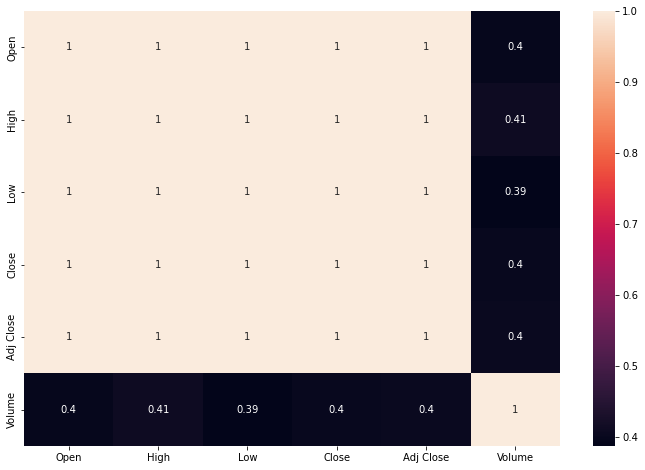

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True);

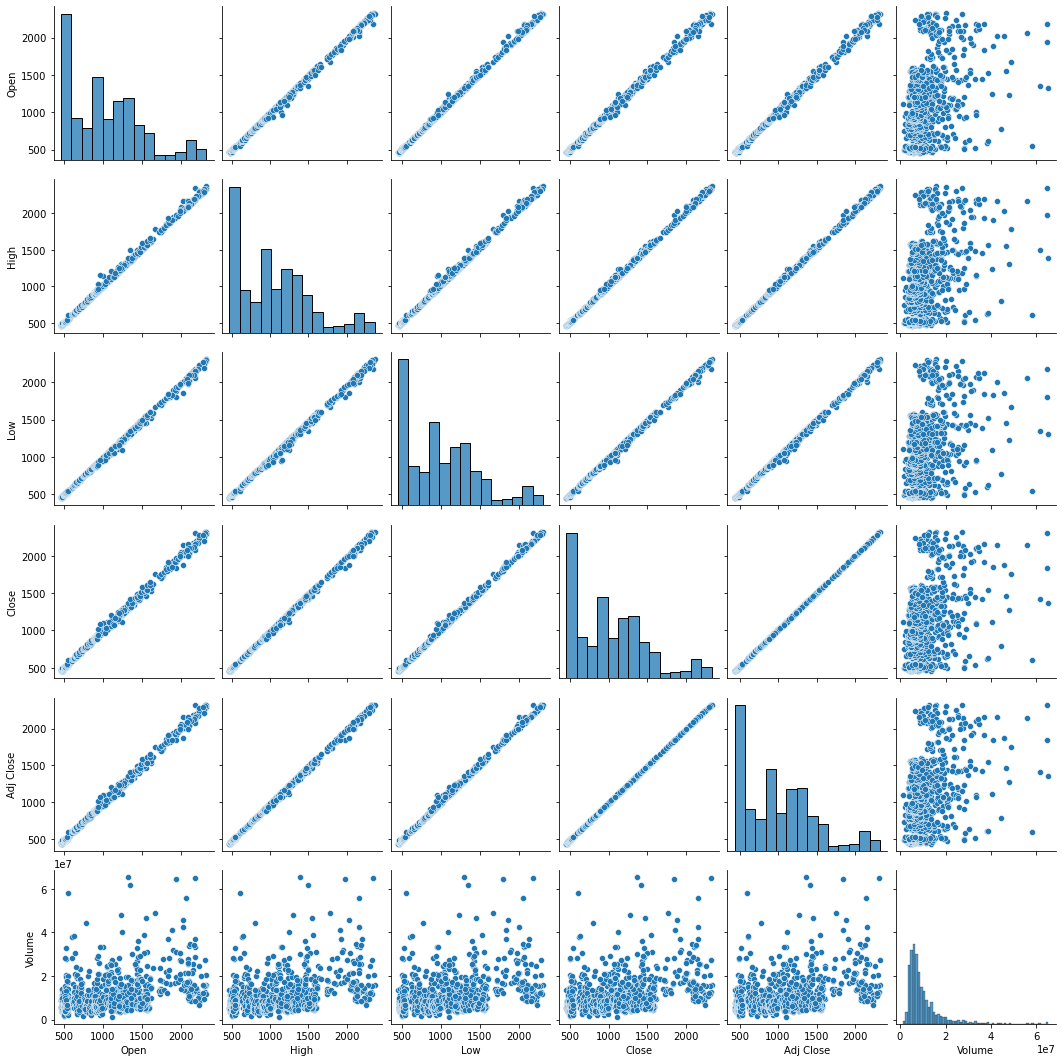

In [25]:
sns.pairplot(df);

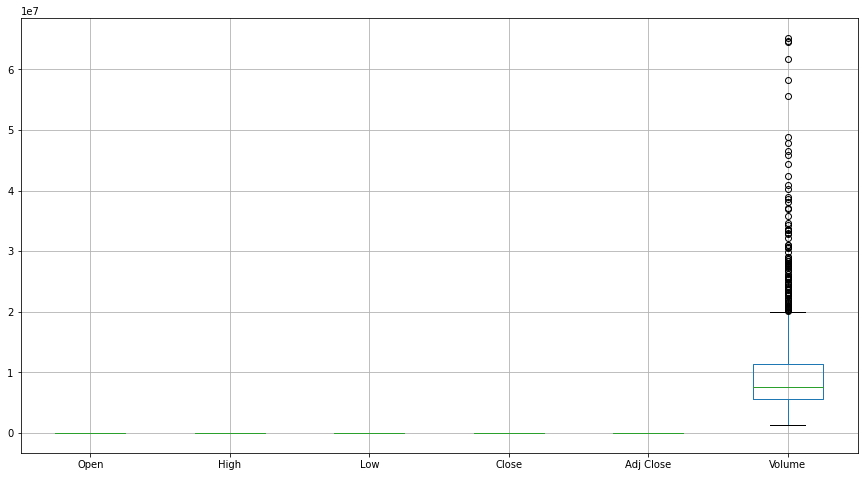

In [26]:
plt.figure(figsize=(15,8))
df.boxplot();

In [27]:
for cols in df.columns[:-1]:
    Q1 = df[cols].quantile(q=0.25)
    Q3 = df[cols].quantile(q=0.75)
    iqr=Q3-Q1
    
    low = Q1-1.5*(Q3-Q1)
    high = Q3+1.5*(Q3-Q1)
    df.loc[(df[cols]<low) | (df[cols]>high),cols] = df[cols].median()

<AxesSubplot:>

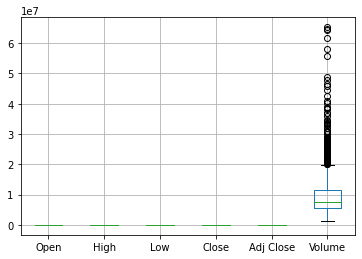

In [28]:
df.boxplot()

In [29]:
X=df.drop('Close',axis=1)
y=df['Close']

In [30]:
from sklearn.preprocessing import StandardScaler
# define StandScaler scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(X)

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled,y,test_size=0.2,random_state=42)
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
Reg_predict=reg.predict(X_test)

In [32]:
reg.score(X_train, y_train)

0.9999631722037752

In [33]:
reg.score(X_test, y_test)

0.9999679529513045

# Simple Linear Regression

In [34]:
X=df['Open'].values.reshape(-1,1)

In [35]:
y=df['Close'].values

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)
reg1 = LinearRegression()

In [37]:
reg1.fit(X_train,y_train)

LinearRegression()

In [38]:
# Printing the model coefficients
print("intercepts:",reg1.intercept_)
print("coefficents:",reg1.coef_)

intercepts: 3.8356976285829205
coefficents: [0.99555576]


In [39]:
y_train_pred= reg1.predict(X_train)
y_test_pred=reg1.predict(X_test)

In [40]:
reg1.score(X_train,y_train)

0.9978640156800405

In [41]:
reg1.score(X_test,y_test)

0.9982686259460007

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


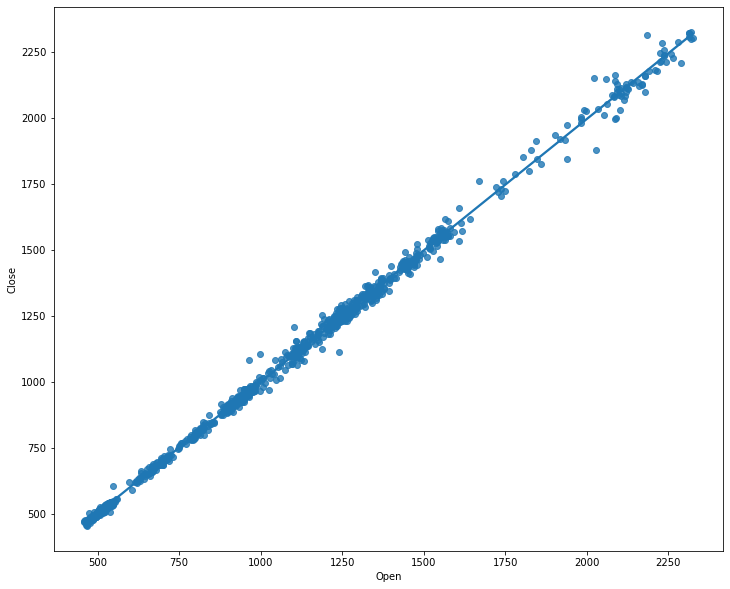

In [42]:
#To draw best fit line on train data
plt.figure(figsize=(12,10));
sns.regplot(X_train,y_train);
plt.xlabel('Open')
plt.ylabel("Close");

In [43]:
reg1.predict(np.array([210]).reshape(1,-1))

array([212.90240698])

## Performance Metrics

In [50]:
# R2 And MSE
from sklearn import metrics
print("R score",metrics.r2_score(y_train,y_train_pred))
print("MSE = ", metrics.mean_squared_error(y_train,y_train_pred))

R score 0.9978640156800405
MSE =  455.8735925339307


In [51]:
from sklearn import metrics
print("R score",metrics.r2_score(y_test,y_test_pred))
print("MSE = ", metrics.mean_squared_error(y_test,Reg_predict))

R score 0.9982686259460007
MSE =  6.844461001274458


## Cross Validation

In [52]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
folds=KFold(n_splits = 10, shuffle=True, random_state=42)
scores=cross_val_score(reg1,X_train,y_train, scoring='r2', cv=folds)
scores
accuracy_fold=np.mean(abs(scores))
accuracy_fold

0.9978271903047352

In [53]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
folds=KFold(n_splits = 10, shuffle=True, random_state=42)
scores=cross_val_score(reg1,X_test,y_test, scoring='r2', cv=folds)
scores
accuracy_fold=np.mean(abs(scores))
accuracy_fold

0.9980213482960302

## Regularization

In [97]:
# Lasso(L1)
from sklearn import linear_model 
lasso_reg = linear_model.Lasso(alpha=500, max_iter=100, tol=0.01)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=500, max_iter=100, tol=0.01)

In [98]:
lasso_reg.score(X_train, y_train)

0.9978585642922849

In [99]:
lasso_reg.score(X_test, y_test)

0.9982546821668715

In [100]:
# Ridge(L2)
from sklearn import linear_model
ridge_reg= linear_model.Ridge(alpha=500, max_iter=100, tol=0.01)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=500, max_iter=100, tol=0.01)

In [101]:
ridge_reg.score(X_train, y_train)

0.9978640156744716

In [102]:
ridge_reg.score(X_test, y_test)

0.9982686173543499

In [103]:
# Elastic Net
from sklearn.linear_model import ElasticNet
en_mod = ElasticNet(alpha=0.02)
en_mod.fit(X_train, y_train)
en_model_pred = en_mod.predict(X_test)

In [104]:
en_mod.score(X_train, y_train)

0.9978640156800317

In [105]:
en_mod.score(X_test, y_test)

0.9982686256069444

# Multiple Linear Regression

In [57]:
X=df.drop('Close',axis=1)

In [58]:
y=df['Close'].values.reshape(-1,1)

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=45)
lr = LinearRegression()

In [60]:
lr.fit(X_train,y_train)

LinearRegression()

In [61]:
y_train_pred=lr.predict(X_train)

In [62]:
y_test_pred=lr.predict(X_test)

In [63]:
lr.score(X_train,y_train)

0.9999647033722295

In [64]:
lr.score(X_test,y_test)

0.9999616914866686

## Performance Metrics

In [65]:
# R2 And MSE
from sklearn import metrics
print("R score",metrics.r2_score(y_train,y_train_pred))
print("MSE = ", metrics.mean_squared_error(y_train,y_train_pred))

R score 0.9999647033722295
MSE =  7.579241401659003


In [66]:
# R2 And MSE
from sklearn import metrics
print("R score",metrics.r2_score(y_test,y_test_pred))
print("MSE = ", metrics.mean_squared_error(y_test,y_test_pred))

R score 0.9999616914866686
MSE =  8.061556453746013


## Cross Validation

In [67]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
folds=KFold(n_splits = 10, shuffle=True, random_state=42)
scores=cross_val_score(lr,X_train,y_train, scoring='r2', cv=folds)
scores
accuracy_fold=np.mean(abs(scores))
accuracy_fold

0.9999628729087385

In [68]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
folds=KFold(n_splits = 10, shuffle=True, random_state=42)
scores=cross_val_score(lr,X_test,y_test, scoring='r2', cv=folds)
scores
accuracy_fold=np.mean(abs(scores))
accuracy_fold

0.9999581079812758

## Regularization

In [70]:
#Lasso(L1)
from sklearn import linear_model 
lasso_reg1 = linear_model.Lasso(alpha=50, max_iter=100, tol=0.01)
lasso_reg1.fit(X_train, y_train)

Lasso(alpha=50, max_iter=100, tol=0.01)

In [71]:
lasso_reg1.score(X_train, y_train)

0.9983033821241601

In [72]:
lasso_reg1.score(X_test, y_test)

0.9972999651571715

In [73]:
# Ridge(L2)
from sklearn import linear_model
ridge_reg1= linear_model.Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg1.fit(X_train, y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [74]:
ridge_reg1.score(X_train, y_train)

0.9999647032986319

In [75]:
ridge_reg1.score(X_test, y_test)

0.9999616845538326

In [76]:
# Elastic Net
from sklearn.linear_model import ElasticNet
en_mod1 = ElasticNet(alpha=0.02)
en_mod1.fit(X_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.855e+04, tolerance: 1.851e+04
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=0.02)

In [77]:
en_mod1.score(X_train, y_train)

0.9997996439926566

In [78]:
en_mod1.score(X_test, y_test)

0.9997169999632537

## Grid Search

In [79]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=10)
print('scores',scores)
accuracy_regfold=np.mean(abs(scores))
print('\nCV mean',accuracy_regfold)

scores [0.9999367  0.99996822 0.99996338 0.99996025 0.99996023 0.99995615
 0.99996705 0.99997655 0.99996842 0.99996797]

CV mean 0.9999624919262793


In [80]:
from sklearn.feature_selection import RFE
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 8, shuffle = True, random_state = 45)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 8))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)      

In [81]:
from sklearn.model_selection import GridSearchCV
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train) 

Fitting 8 folds for each of 7 candidates, totalling 56 fits


GridSearchCV(cv=KFold(n_splits=8, random_state=45, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7]}],
             return_train_score=True, scoring='r2', verbose=1)

In [82]:
model_cv.best_estimator_

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [83]:
# final model
n_features_optimal = 1

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = lm.predict(X_test)
import sklearn.metrics
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.9999616914866686


# Conclusion: 
## Multipal Linear Regression Has More Accuracy Than Simple Linear Regression.

##  Multipal Linear Regression Is Best For This DataSet.